age 이상치 제거: 66개 행 삭제 (남은 데이터: 825행)
fare 이상치 제거: 107개 행 삭제 (남은 데이터: 718행)


c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canv

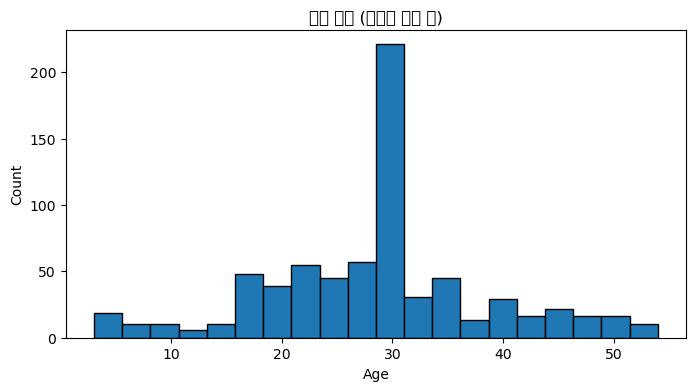

c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


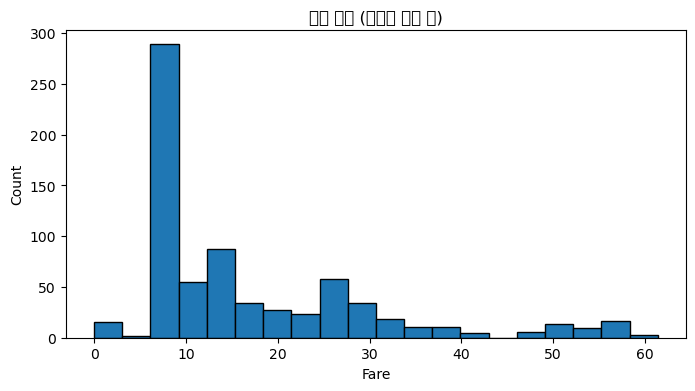

c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TAEKWONLEE\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.


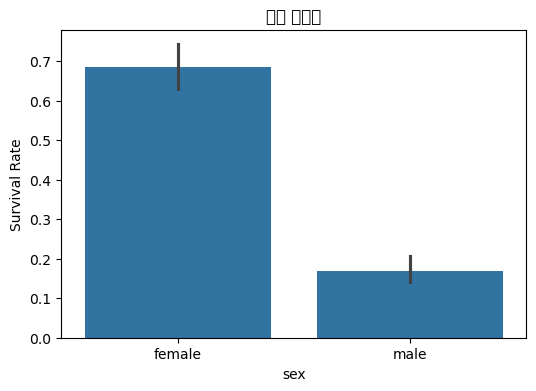

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
titanic = sns.load_dataset('titanic')

# 2. 결측치 처리
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())

# 3. deck 컬럼 결측치 처리 - 에러 없이!
if titanic['deck'].dtype.name == 'category':
    titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck'] = titanic['deck'].fillna('Unknown')

# 4. 카테고리 변수 변환 (분석/시각화 용이)
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')

# 5. 이상치 처리 (IQR, 나이와 요금)
num_cols = ['age', 'fare']
for col in num_cols:
    Q1 = titanic[col].quantile(0.25)
    Q3 = titanic[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = titanic.shape[0]
    titanic = titanic[(titanic[col] >= lower) & (titanic[col] <= upper)]
    after = titanic.shape[0]
    print(f"{col} 이상치 제거: {before - after}개 행 삭제 (남은 데이터: {after}행)")

# 6. 시각화

# (1) 나이 분포
plt.figure(figsize=(8,4))
plt.hist(titanic['age'], bins=20, edgecolor='k')
plt.title('나이 분포 (이상치 제거 후)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# (2) 요금 분포
plt.figure(figsize=(8,4))
plt.hist(titanic['fare'], bins=20, edgecolor='k')
plt.title('요금 분포 (이상치 제거 후)')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# (3) 성별 생존률
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('성별 생존률')
plt.ylabel('Survival Rate')
plt.show()